In [1]:
from google.colab import output
output.enable_custom_widget_manager()

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
dataset = load_iris()
data = dataset['data'][:,2:]
k = 3
iterations = 20

In [4]:
def reassign(prototypes):
  nbrs = NearestNeighbors(n_neighbors = 1).fit(prototypes) 
  _, indices = nbrs.kneighbors(data)
  return indices.flatten()

def recalculate(indices):
  prototypes = []
  clusters = []

  for i in range(k): #create k empty clusters
    clusters.append([])

  for i in range(len(indices)): #add data points to clusters
    clusters[indices[i]].append(data[i]) #calculate cluster centers

  for cluster in clusters:
    center = sum(cluster) / len(cluster) #error for empty clusters
    prototypes.append(center)

  return np.array(prototypes)

def total_variances(indices, prototypes):
  distances = distance.cdist(data, prototypes, 'euclidean') 
  variance = 0

  for i in range(len(indices)):
    variance += distances[i][indices[i]]**2
    
  return variance

In [5]:
np.random.seed(2)
cluster_prototypes = []
cluster_indices = []
variances = []

current_prototypes = []
maxindex = len(data) - 1 

for i in range(k):
  current_prototypes.append(data[np.random.randint(0,maxindex)])

current_prototypes = np.array(current_prototypes)
cluster_prototypes.append(current_prototypes)

#first assignment
current_indices = reassign(current_prototypes)
cluster_indices.append(current_indices)
variances.append(total_variances(current_indices, current_prototypes))

#iterate
for i in range(20):
  current_prototypes = recalculate(current_indices)
  current_indices = reassign(current_prototypes)
  variances.append(total_variances(current_indices, current_prototypes))

  cluster_prototypes.append(current_prototypes)
  cluster_indices.append(current_indices)

interactive(children=(IntSlider(value=0, description='Iteration:', max=20), Output()), _dom_classes=('widget-i…

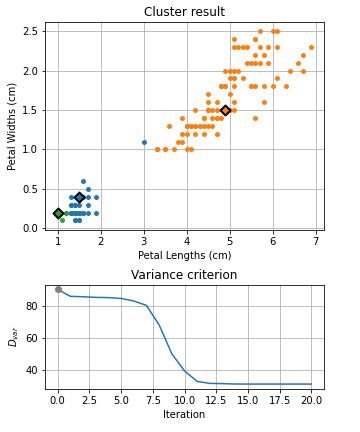

In [6]:
%matplotlib widget

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6),gridspec_kw={'height_ratios': [2, 1]}) 
fig.subplots_adjust(hspace=0.35, top=0.95, bottom=0.1)

def plot_cluster(iteration):
  indices = cluster_indices[iteration] 
  prototypes = cluster_prototypes[iteration]
  ax1.clear()
  ax2.clear()

  # Plot each cluster
  for i in range(k):
    points = data[indices == i, :]
    ax1.scatter(points[:, 0], points[:, 1], c='C{:d}'.format(i), s=15) 
    ax1.scatter(prototypes[i, 0], prototypes[i, 1], c='C{:d}'.format(i),marker='D', s=50, edgecolor='k', linewidth=2)

  ax1.set_xlabel('Petal Lengths (cm)')
  ax1.set_ylabel('Petal Widths (cm)')
  ax1.set_title('Cluster result')
  ax1.set_axisbelow(True)
  ax1.grid()

  # Variance plot
  ax2.plot(variances)
  ax2.scatter(iteration, variances[iteration], c='gray', zorder=3)
  ax2.set_xlabel('Iteration')
  ax2.set_ylabel('$D_{var}$')
  ax2.set_title('Variance criterion')
  ax2.set_axisbelow(True)
  ax2.grid()

iteration_slider = widgets.IntSlider(min=0, max=iterations,description='Iteration:')
interact(plot_cluster, iteration=iteration_slider);